In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("../../")
sys.path.append("../../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SUnet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
net1_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_64.npy")
net5_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_64.npy")[:32,:,:,:]
net6_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_128.npy")[:64,:,:,:]
net7_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_200.npy")[:100,:,:,:]
net8_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_256.npy")[:128,:,:,:]

In [3]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [4]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [5]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [6]:
enc_nf = [32, 32, 32, 32]
dec_nf = [32, 32, 32, 32]
net5 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net5_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net5.to(device=device)
train_scores5, val_scores5, train_var_5, val_var_5 = train_net(net=net5,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

(32, 64, 3, 3)


INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.24906503744832761
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 16.26batch/s]
                                                                    INFO: Validation Dice Loss: 0.22851168634472313
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.22917197873959175
Validation round: 100%|██████████| 91

Validation round:  92%|█████████▏| 84/91 [00:05<00:00, 16.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.1979059860274032
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.18batch/s]
                                                                    INFO: Validation Dice Loss: 0.2028184610081243
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.01batch/s]
                                                                    INFO: Validation Dice Loss: 0.2091670674937112
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.19047585997607683
Epoch 1/8: 100%|██████████| 5865/5865 [01:17<00:00, 75.60img/s, loss (batch)=0.46]  
INFO: Checkpoint 1 saved !
Validation round:  70%|███████   | 64/91 [00:04<00:01, 17.08batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.18978145816823938
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.19340912915848113
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 16.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.18823709232466562
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.19486988671533353
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.00batch/s]
                                                                    INFO: Validation Dice Loss: 0.18762406559435876
Validation round:  34%|███▍      | 31/91 [00:02<00:05, 11.32batch/s]


Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 18.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.18431506477869475
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.85batch/s]
                                                                    INFO: Validation Dice Loss: 0.1838958869268606
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.18334462976717686
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.90batch/s]
                                                                    INFO: Validation Dice Loss: 0.18695737519762018
Epoch 2/8: 100%|██████████| 5865/5865 [01:24<00:00, 69.59img/s, loss (batch)=0.352] 
INFO: Checkpoint 2 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.75batch/s]
                                                                    INFO: Valida

Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 19.54batch/s]
                                                                    INFO: Validation Dice Loss: 0.18403601449924512
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.18124263332440302
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.19059575095281497
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 21.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.1829045023564454
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.17994226629917437


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.18076342933780545
Validation round:  92%|█████████▏| 84/91 [00:05<00:00, 16.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.18074783912071815
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.17967613811021324
Epoch 3/8: 100%|██████████| 5865/5865 [01:23<00:00, 70.18img/s, loss (batch)=0.203] 
INFO: Checkpoint 3 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.1804344153011238
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.21batch/s]
                                                                    INFO: Valida

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.1813640296459198
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.17849916448959938
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.26batch/s]
                                                                    INFO: Validation Dice Loss: 0.1791144624188706
Validation round:  95%|█████████▍| 86/91 [00:05<00:00, 14.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.17969242491564907
Validation round:  66%|██████▌   | 60/91 [00:03<00:01, 16.95batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.1788254588187396
Validation round:  97%|█████████▋| 88/91 [00:04<00:00, 21.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.17923926553883396
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.82batch/s]
                                                                    INFO: Validation Dice Loss: 0.17975671245501593
Epoch 4/8: 100%|██████████| 5865/5865 [01:24<00:00, 69.15img/s, loss (batch)=0.236] 
INFO: Checkpoint 4 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.17930284371742836
Validation round:  93%|█████████▎| 85/91 [00:04<00:00, 18.14batch/s]
                                                                    INFO: Valida

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.17922048221577655
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.1793183505862624
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.25batch/s]
                                                                    INFO: Validation Dice Loss: 0.17928586572736174
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.70batch/s]
                                                                    INFO: Validation Dice Loss: 0.17928522988990114
Validation round:  30%|██▉       | 27/91 [00:02<00:09,  6.46batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.87batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926913221458812
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.32batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926893047579043
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926937882061844
Epoch 5/8: 100%|██████████| 5865/5865 [01:24<00:00, 69.40img/s, loss (batch)=0.273] 
INFO: Checkpoint 5 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.1792687352869537
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.57batch/s]
                                                                    INFO: Valida

Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 15.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926554218098356
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926534781089196
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926696483250504
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.16batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926717017378127
Validation round:  54%|█████▍    | 49/91 [00:03<00:03, 12.90batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.1792671942448878
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.17batch/s]
                                                                    INFO: Validation Dice Loss: 0.1792645372532226
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 14.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926126407397971
Epoch 6/8: 100%|██████████| 5865/5865 [01:22<00:00, 70.79img/s, loss (batch)=0.244] 
INFO: Checkpoint 6 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925688444258092
Validation round:  88%|████████▊ | 80/91 [00:04<00:00, 21.72batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925832461524796
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925867978688126
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.27batch/s]
                                                                    INFO: Validation Dice Loss: 0.17926089563867548
Validation round:  96%|█████████▌| 87/91 [00:05<00:00, 18.94batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925887726820433
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 16.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.1792580966766064
Validation round:  70%|███████   | 64/91 [00:04<00:01, 16.74batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925450385926844
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925259667438465
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925366890299452
Epoch 7/8: 100%|██████████| 5865/5865 [01:24<00:00, 69.56img/s, loss (batch)=0.176] 
INFO: Checkpoint 7 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925436287135868
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.19batch/s]
                                                                    INFO: Valid

Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.24batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925475390402826
Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.1792512819334701
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.1792518064215943
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925117828033782
Validation round:  75%|███████▍  | 68/91 [00:04<00:01, 13.32batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.17924980327978238
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.78batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925159272911784
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.29batch/s]
                                                                    INFO: Validation Dice Loss: 0.17925106922348777
Epoch 8/8: 100%|██████████| 5865/5865 [01:25<00:00, 68.27img/s, loss (batch)=0.218] 
INFO: Checkpoint 8 saved !


In [7]:
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]
net6 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net6_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net6.to(device=device)
train_scores6, val_scores6, train_var_6, val_var_6 = train_net(net=net6,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/5865 [00:00<?, ?img/s]

(64, 128, 3, 3)


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.31batch/s]
                                                                    INFO: Validation Dice Loss: 0.22978498074379597
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.93batch/s]
                                                                    INFO: Validation Dice Loss: 0.2027825164598423
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.19224305745664533
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 19.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.1844400968197938
Validation round:   5%|▌         | 5/91 [00:00<00:52,  1.65batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.60batch/s]
                                                                    INFO: Validation Dice Loss: 0.17285593672768101
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.11batch/s]
                                                                    INFO: Validation Dice Loss: 0.16726606969649976
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.170369640483961
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.18batch/s]
                                                                    INFO: Validation Dice Loss: 0.1639871910050675
Epoch 1/8: 100%|██████████| 5865/5865 [01:23<00:00, 70.46img/s, loss (batch)=0.531] 
INFO: Checkpoint 1 saved !
Validation round:  20%|█▉        | 18/91 [00:01<00:13,  5.23batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.90batch/s]
                                                                    INFO: Validation Dice Loss: 0.16608732136396262
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.16278943665080017
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.68batch/s]
                                                                    INFO: Validation Dice Loss: 0.16292237711476756
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 17.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.15863115848093243
Validation round:  59%|█████▉    | 54/91 [00:03<00:02, 16.38batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.63batch/s]
                                                                    INFO: Validation Dice Loss: 0.1561741802718613
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.15489688278227062
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.73batch/s]
                                                                    INFO: Validation Dice Loss: 0.15289832659802594
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.74batch/s]
                                                                    INFO: Validation Dice Loss: 0.1530232671034205
Validation round:  95%|█████████▍| 86/91 [00:05<00:00, 16.85batch/s]
                                                                    INFO: Validation Dice Loss: 0.14951494278816077
Epoch 2/8: 100%|██████████| 5865/5865 [01:30<00:00, 64.74img/s, loss (batch)=

Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 22.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.1562084204384259
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 19.31batch/s]
                                                                    INFO: Validation Dice Loss: 0.15086182493429917
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.79batch/s]
                                                                    INFO: Validation Dice Loss: 0.14678155991074804
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 19.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.15178255663140788
Validation round:  27%|██▋       | 25/91 [00:02<00:12,  5.24batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.63batch/s]
                                                                    INFO: Validation Dice Loss: 0.14996253003130902
Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.15011419969928133
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.21batch/s]
                                                                    INFO: Validation Dice Loss: 0.14552858856680628
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 17.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.14525591975057517
Validation round:  31%|███       | 28/91 [00:02<00:07,  7.89batch/s]


Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 18.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.14417421760467383
Epoch 3/8: 100%|██████████| 5865/5865 [01:28<00:00, 66.31img/s, loss (batch)=0.296] 
INFO: Checkpoint 3 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.14616258008466973
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.14537437997021518
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 13.47batch/s]
                                                                    INFO: Validation Dice Loss: 0.14546134756816612
Validation round:  54%|█████▍    | 49/91 [00:03<00:03, 10.55batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.14526386559009552
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.12batch/s]
                                                                    INFO: Validation Dice Loss: 0.144807083266122
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 20.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.1449190004841312
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.14490881365734143
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.90batch/s]


                                                                    INFO: Validation Dice Loss: 0.14487134853562156
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 14.90batch/s]
                                                                    INFO: Validation Dice Loss: 0.144799418256178
Epoch 4/8: 100%|██████████| 5865/5865 [01:30<00:00, 64.50img/s, loss (batch)=0.355] 
INFO: Checkpoint 4 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.99batch/s]
                                                                    INFO: Validation Dice Loss: 0.14478321840147396
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.96batch/s]
                                                                    INFO: Validation Dice Loss: 0.14478486981038208
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 19.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.14477799710009123
Validation round:  12%|█▏        |

Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.14batch/s]
                                                                    INFO: Validation Dice Loss: 0.14477657223795795
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.06batch/s]
                                                                    INFO: Validation Dice Loss: 0.14477546971577865
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.14477360649750784
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476991166452785
Validation round:  54%|█████▍    | 49/91 [00:03<00:03, 12.40batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.1447699867434554
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.18batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476865890261892
Epoch 5/8: 100%|██████████| 5865/5865 [01:28<00:00, 66.10img/s, loss (batch)=0.37]  
INFO: Checkpoint 5 saved !
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 22.79batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476938504766632
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476911297866277
Validation round:  87%|████████▋ | 79/91 [00:05<00:00, 17.02batch/s]


Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 21.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.1447686946817807
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.14477062954024955
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 18.38batch/s]
                                                                    INFO: Validation Dice Loss: 0.14477018602601774
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.24batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476963853115563
Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.07batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476733924923363
Validation round:  16%|█▋        | 15/91 [00:01<00:18,  4.21batch/s]


Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 22.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476817043928
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.97batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476656168699265
Epoch 6/8: 100%|██████████| 5865/5865 [01:29<00:00, 65.28img/s, loss (batch)=0.362] 
INFO: Checkpoint 6 saved !
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476821129466153
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476623214208162
Validation round:  66%|██████▌   | 60/91 [00:03<00:01, 15.74batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476632613402146
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.47batch/s]
                                                                    INFO: Validation Dice Loss: 0.144767858006142
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.1447678519474281
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.1447684712462373
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.1447699268113126
Validation round:   0%|          | 0/91 [00:00<?, ?batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.1447680183164366
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476598643667096
Epoch 7/8: 100%|██████████| 5865/5865 [01:29<00:00, 65.54img/s, loss (batch)=0.306] 
INFO: Checkpoint 7 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.21batch/s]
                                                                    INFO: Validation Dice Loss: 0.1447656077670527
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.29batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476702927233098


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476550845326958
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476410684349772
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 23.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476436319259497
Validation round:  96%|█████████▌| 87/91 [00:05<00:00, 18.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476374029130726
Validation round:  57%|█████▋    | 52/91 [00:03<00:02, 15.59batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.96batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476346429232712
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.93batch/s]
                                                                    INFO: Validation Dice Loss: 0.14476227408254538
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.1447621782074918
Epoch 8/8: 100%|██████████| 5865/5865 [01:29<00:00, 65.27img/s, loss (batch)=0.315] 
INFO: Checkpoint 8 saved !


In [8]:
enc_nf = [100, 100, 100, 100]
dec_nf = [100, 100, 100, 100]
net7 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net7_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net7.to(device=device)
train_scores7, val_scores7, train_var_7, val_var_7 = train_net(net=net7,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/5865 [00:00<?, ?img/s]

(100, 200, 3, 3)


Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 21.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.17902215414649839
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.15658338777311556
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.14739467129930034


Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.06batch/s]
                                                                    INFO: Validation Dice Loss: 0.1413441266823601
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.71batch/s]
                                                                    INFO: Validation Dice Loss: 0.1422519515995141
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.33batch/s]
                                                                    INFO: Validation Dice Loss: 0.1413986778685025
Validation round:   3%|▎         | 3/91 [00:00<00:44,  1.97batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.05batch/s]
                                                                    INFO: Validation Dice Loss: 0.14009139629510733
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 17.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.13910265880954134
Epoch 1/8: 100%|██████████| 5865/5865 [02:03<00:00, 47.68img/s, loss (batch)=0.527]
INFO: Checkpoint 1 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 23.06batch/s]
                                                                    INFO: Validation Dice Loss: 0.1342433261183592
Validation round:  45%|████▌     | 41/91 [00:02<00:02, 17.56batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 23.27batch/s]
                                                                    INFO: Validation Dice Loss: 0.13294702923887378
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.13333984235158333
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.1335757669511732
Validation round:  87%|████████▋ | 79/91 [00:04<00:00, 21.39batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.13453270200189654
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.1305610445829538
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.60batch/s]
                                                                    INFO: Validation Dice Loss: 0.13053410213727218
Validation round:  93%|█████████▎| 85/91 [00:05<00:00, 19.43batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.43batch/s]
                                                                    INFO: Validation Dice Loss: 0.13108912053016517
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.12969880534724876
Epoch 2/8: 100%|██████████| 5865/5865 [02:11<00:00, 44.60img/s, loss (batch)=0.546]
INFO: Checkpoint 2 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.21batch/s]
                                                                    INFO: Validation Dice Loss: 0.134405544089092
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 22.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.12876310486059922


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.53batch/s]
                                                                    INFO: Validation Dice Loss: 0.1307903562600796
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.59batch/s]
                                                                    INFO: Validation Dice Loss: 0.12932268939502947
Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.1312801194387478
Validation round:  14%|█▍        | 13/91 [00:01<00:18,  4.19batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.17batch/s]
                                                                    INFO: Validation Dice Loss: 0.13037879584909795
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 23.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.13045730720182042
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.12964985003838173
Validation round:  53%|█████▎    | 48/91 [00:03<00:02, 19.70batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.12934767782360643
Epoch 3/8: 100%|██████████| 5865/5865 [02:10<00:00, 45.08img/s, loss (batch)=0.506]
INFO: Checkpoint 3 saved !
Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.12952692749408576
Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.12938059424306012
Validation round:  95%|█████████▍| 86/91 [00:05<00:00, 19.96batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.129407823740781
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 23.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.12943446685324658
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.12946132791566325
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.12945922832567613
Validation round:  22%|██▏       | 20/91 [00:01<00:08,  8.06batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294619741511869
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.12946536064475447
Validation round: 100%|██████████| 91/91 [00:05<00:00, 16.83batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294679656461045
Epoch 4/8: 100%|██████████| 5865/5865 [02:09<00:00, 45.17img/s, loss (batch)=0.508]
INFO: Checkpoint 4 saved !
Validation round:  56%|█████▌    | 51/91 [00:03<00:02, 15.80batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.46batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294688011755
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.79batch/s]
                                                                    INFO: Validation Dice Loss: 0.12946951397500195
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294684098972069
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.92batch/s]
                                                                    INFO: Validation Dice Loss: 0.12946937347833926
Validation round:   0%|          | 0/91 [00:00<?, ?batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 19.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294727146953017
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.12947326530139525
Validation round: 100%|██████████| 91/91 [00:05<00:00, 23.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.12947356193275242
Validation round:  58%|█████▊    | 53/91 [00:03<00:02, 18.54batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294761497404549
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.12947673743570243
Epoch 5/8: 100%|██████████| 5865/5865 [02:12<00:00, 44.40img/s, loss (batch)=0.497]
INFO: Checkpoint 5 saved !
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.47batch/s]
                                                                    INFO: Validation Dice Loss: 0.12947553551786548
Validation round:  79%|███████▉  | 72/91 [00:04<00:01, 18.69batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294790314776557
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.70batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294814272077529
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.99batch/s]
                                                                    INFO: Validation Dice Loss: 0.12948154846390525
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.87batch/s]
                                                                    INFO: Validation Dice Loss: 0.12948220124938986
Epoch 6/8:  59%|█████▊    | 3440/5865 [01:15<00:33, 71.88img/s, loss (batch)=0.534]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 22.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.12948628015570587
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 22.71batch/s]
                                                                    INFO: Validation Dice Loss: 0.12948542538580005
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.129487126492537
Validation round:  43%|████▎     | 39/91 [00:02<00:03, 13.44batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 15.87batch/s]
                                                                    INFO: Validation Dice Loss: 0.12949001109534566
Epoch 6/8: 100%|██████████| 5865/5865 [02:11<00:00, 44.67img/s, loss (batch)=0.519]
INFO: Checkpoint 6 saved !
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.12949051347735163
Validation round:  97%|█████████▋| 88/91 [00:05<00:00, 20.95batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294922336608499
Validation round:  84%|████████▎ | 76/91 [00:04<00:00, 18.72batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.1294919469363087
Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.12949086815773786
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.12949736260778302
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 21.60batch/s]
                                                                    INFO: Validation Dice Loss: 0.12950182329494875
Validation round:  13%|█▎        | 12/91 [00:01<00:17,  4.64batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.1295018910051702
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 18.60batch/s]
                                                                    INFO: Validation Dice Loss: 0.12950067934426632
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 16.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.12950005742547277
Epoch 7/8: 100%|██████████| 5865/5865 [02:10<00:00, 45.01img/s, loss (batch)=0.54] 
INFO: Checkpoint 7 saved !
Validation round:  30%|██▉       | 27/91 [00:02<00:04, 13.86batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 23.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.12950213376309846
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 19.65batch/s]
                                                                    INFO: Validation Dice Loss: 0.12950254935812164
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.12950189468952325
Validation round:  47%|████▋     | 43/91 [00:03<00:02, 16.52batch/s]


Validation round: 100%|██████████| 91/91 [00:05<00:00, 21.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.1295022361062385
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 22.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.12950430736764446
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 20.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.1295030101478755
Validation round:  56%|█████▌    | 51/91 [00:03<00:02, 14.53batch/s]


Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 21.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.1295093324158218
Validation round:  98%|█████████▊| 89/91 [00:05<00:00, 20.19batch/s]
                                                                    INFO: Validation Dice Loss: 0.12951022108177562
Validation round: 100%|██████████| 91/91 [00:05<00:00, 20.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.1295093623000187
Epoch 8/8: 100%|██████████| 5865/5865 [02:10<00:00, 45.04img/s, loss (batch)=0.535] 
INFO: Checkpoint 8 saved !


In [9]:
enc_nf = [128, 128, 128, 128]
dec_nf = [128, 128, 128, 128]
net8 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net8_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net8.to(device=device)
train_scores8, val_scores8, train_var_8, val_var_8 = train_net(net=net8,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/5865 [00:00<?, ?img/s]

(128, 256, 3, 3)


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.73batch/s]
                                                                    INFO: Validation Dice Loss: 0.1589676339875211
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.1272846742809474
Validation round:  84%|████████▎ | 76/91 [00:04<00:00, 18.71batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 16.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.11906786868860433
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.11568675656895061
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.10831949409547743
Validation round:  54%|█████▍    | 49/91 [00:03<00:02, 19.23batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.10830502727857003
Validation round: 100%|██████████| 91/91 [00:05<00:00, 18.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.10750959600721087
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.10490828703392993
Epoch 1/8: 100%|██████████| 5865/5865 [02:24<00:00, 40.59img/s, loss (batch)=0.388]
INFO: Checkpoint 1 saved !
Validation round:  22%|██▏       | 20/91 [00:01<00:07,  9.96batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.52batch/s]
                                                                    INFO: Validation Dice Loss: 0.10470065613696863
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.10964668370210208
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.88batch/s]


                                                                    INFO: Validation Dice Loss: 0.10027395950241404
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 17.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.09944713238503906
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.10090770850797276
Validation round:  32%|███▏      | 29/91 [00:03<00:05, 10.62batch/s]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 15.87batch/s]
                                                                    INFO: Validation Dice Loss: 0.10630284790154342
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 12.08batch/s]
                                                                    INFO: Validation Dice Loss: 0.10324598071011869
Validation round:  73%|███████▎  | 66/91 [00:05<00:02, 12.41batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 15.59batch/s]
                                                                    INFO: Validation Dice Loss: 0.09714882861781907
Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.99batch/s]
                                                                    INFO: Validation Dice Loss: 0.09737189670840463
Epoch 2/8: 100%|██████████| 5865/5865 [02:54<00:00, 33.68img/s, loss (batch)=0.401]
INFO: Checkpoint 2 saved !
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.09632024390029383


Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.09740273294213055
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 12.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.09657736982290561
Validation round:  32%|███▏      | 29/91 [00:03<00:04, 14.85batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.09582961530803324
Validation round: 100%|██████████| 91/91 [00:08<00:00, 13.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.09676386743456453
Validation round:  64%|██████▎   | 58/91 [00:05<00:02, 12.46batch/s]


Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 11.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.09748193154950718
Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.73batch/s]
                                                                    INFO: Validation Dice Loss: 0.09574204617804223
Validation round:  97%|█████████▋| 88/91 [00:07<00:00, 13.98batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.09654783334705856
Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 13.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.09668089433030767
Epoch 3/8: 100%|██████████| 5865/5865 [03:17<00:00, 29.65img/s, loss (batch)=0.404]
INFO: Checkpoint 3 saved !
Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.09840127514613854
Validation round:  25%|██▌       | 23/91 [00:02<00:06, 11.28batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.90batch/s]
                                                                    INFO: Validation Dice Loss: 0.0959571307668319
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 13.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.09610794181679631
Validation round:  60%|██████    | 55/91 [00:05<00:03, 11.50batch/s]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 14.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.09607907908630896
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 11.78batch/s]
                                                                    INFO: Validation Dice Loss: 0.0960704682620017
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 11.92batch/s]


                                                                    INFO: Validation Dice Loss: 0.09599066239136916
Validation round: 100%|██████████| 91/91 [00:08<00:00, 13.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.09594824992038392
Validation round: 100%|██████████| 91/91 [00:08<00:00, 12.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596015349194244
Validation round:  23%|██▎       | 21/91 [00:02<00:06, 10.65batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 12.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.095959838111322
Epoch 4/8: 100%|██████████| 5865/5865 [03:16<00:00, 29.90img/s, loss (batch)=0.491]
INFO: Checkpoint 4 saved !
Validation round: 100%|██████████| 91/91 [00:07<00:00, 13.37batch/s]
                                                                    INFO: Validation Dice Loss: 0.0959636722947215
Validation round:  52%|█████▏    | 47/91 [00:05<00:04, 10.85batch/s]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 14.24batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596340644818085
Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.77batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596139069769409
Validation round:  82%|████████▏ | 75/91 [00:06<00:01, 12.26batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.54batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596164712866584
Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596202416079384
Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596224292949006
Validation round:   2%|▏         | 2/91 [00:01<01:03,  1.40batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 15.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596325915593368
Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 13.18batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596506686328532
Validation round:  42%|████▏     | 38/91 [00:03<00:04, 10.78batch/s]


Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 11.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596405669555559
Epoch 5/8: 100%|██████████| 5865/5865 [03:18<00:00, 29.60img/s, loss (batch)=0.394]
INFO: Checkpoint 5 saved !
Validation round: 100%|██████████| 91/91 [00:07<00:00, 13.29batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596323467545458
Validation round:  70%|███████   | 64/91 [00:06<00:02, 12.78batch/s]


Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 14.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596294516717994
Validation round:  99%|█████████▉| 90/91 [00:08<00:00, 17.60batch/s]
                                                                    INFO: Validation Dice Loss: 0.0959637728366223
Validation round: 100%|██████████| 91/91 [00:07<00:00, 16.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596248552366927
Epoch 6/8:  47%|████▋     | 2784/5865 [01:34<01:15, 41.04img/s, loss (batch)=0.42] 


Validation round: 100%|██████████| 91/91 [00:07<00:00, 17.92batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596308582759165
Validation round: 100%|██████████| 91/91 [00:07<00:00, 14.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596368957024354
Validation round:  49%|████▉     | 45/91 [00:03<00:03, 12.66batch/s]


Validation round: 100%|██████████| 91/91 [00:07<00:00, 14.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596508160069749
Validation round:  98%|█████████▊| 89/91 [00:06<00:00, 19.75batch/s]
                                                                    INFO: Validation Dice Loss: 0.0959633795933409
Validation round: 100%|██████████| 91/91 [00:07<00:00, 18.68batch/s]


                                                                    INFO: Validation Dice Loss: 0.0959635751915502
Epoch 6/8: 100%|██████████| 5865/5865 [03:19<00:00, 29.35img/s, loss (batch)=0.384]
INFO: Checkpoint 6 saved !
Validation round: 100%|██████████| 91/91 [00:08<00:00, 14.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596412907262425
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 11.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596404711623768
Validation round:  30%|██▉       | 27/91 [00:02<00:04, 14.40batch/s]


Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 15.33batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596412178579268
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 14.67batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596416640740174
Validation round:  74%|███████▎  | 67/91 [00:06<00:02, 10.48batch/s]


Validation round: 100%|██████████| 91/91 [00:08<00:00, 11.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596367466908234
Validation round: 100%|██████████| 91/91 [00:07<00:00, 11.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596746545899046
Validation round:  99%|█████████▉| 90/91 [00:06<00:00, 14.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.0959675296486079
Validation round:   8%|▊         | 7/91 [00:01<00:24,  3.47batch/s]


Validation round:  98%|█████████▊| 89/91 [00:06<00:00, 16.53batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596727551012249
Validation round: 100%|██████████| 91/91 [00:08<00:00, 14.60batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596818513595141
Epoch 7/8: 100%|██████████| 5865/5865 [03:21<00:00, 29.13img/s, loss (batch)=0.395]
INFO: Checkpoint 7 saved !
Validation round:  44%|████▍     | 40/91 [00:03<00:04, 11.83batch/s]


Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 11.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.0959663640830543
Validation round:  99%|█████████▉| 90/91 [00:07<00:00, 12.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596740700058885
Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.80batch/s]


                                                                    INFO: Validation Dice Loss: 0.09596800394765623
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.86batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596654199636899
Validation round: 100%|██████████| 91/91 [00:05<00:00, 17.90batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596748535449688
Validation round:  20%|█▉        | 18/91 [00:01<00:06, 11.50batch/s]


Validation round:  99%|█████████▉| 90/91 [00:05<00:00, 18.16batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596751220933683
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 30.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596635237499908
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 24.28batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596641165214581
Validation round:  85%|████████▍ | 77/91 [00:03<00:00, 27.86batch/s]


Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 24.53batch/s]
                                                                    INFO: Validation Dice Loss: 0.09596699762802857
Epoch 8/8: 100%|██████████| 5865/5865 [02:24<00:00, 40.57img/s, loss (batch)=0.4]   
INFO: Checkpoint 8 saved !


configuring combined plots


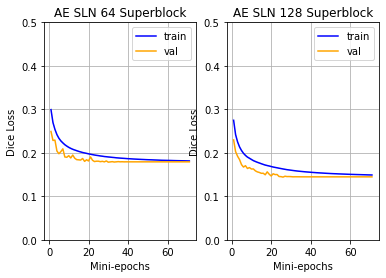

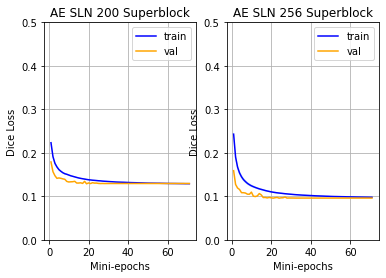

In [10]:
print("configuring combined plots")
domain = len(train_scores5)
x_values = [i+1 for i in range(domain)]

a5 = plt.subplot(1,2,1)
a5.set_ylim([0, 0.5])
plt.title("AE SLN 64 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores5, train_var_5)]
ziptraindown = [a - b for a, b in zip(train_scores5, train_var_5)]
zipvalup = [a + b for a, b in zip(val_scores5, val_var_5)]
zipvaldown = [a - b for a, b in zip(val_scores5, val_var_5)]

plt.plot(x_values, train_scores5, color="blue", label="train")
a5.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores5, color="orange", label="val")
a5.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a6 = plt.subplot(1,2,2)
a6.set_ylim([0, 0.5])
plt.title("AE SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores6, train_var_6)]
ziptraindown = [a - b for a, b in zip(train_scores6, train_var_6)]
zipvalup = [a + b for a, b in zip(val_scores6, val_var_6)]
zipvaldown = [a - b for a, b in zip(val_scores6, val_var_6)]

plt.plot(x_values, train_scores6, color="blue", label="train")
a6.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores6, color="orange", label="val")
a6.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a7 = plt.subplot(1,2,1)
a7.set_ylim([0, 0.5])
plt.title("AE SLN 200 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores7, train_var_7)]
ziptraindown = [a - b for a, b in zip(train_scores7, train_var_7)]
zipvalup = [a + b for a, b in zip(val_scores7, val_var_7)]
zipvaldown = [a - b for a, b in zip(val_scores7, val_var_7)]

plt.plot(x_values, train_scores7, color="blue", label="train")
a7.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores7, color="orange", label="val")
a7.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a8 = plt.subplot(1,2,2)
a8.set_ylim([0, 0.5])
plt.title("AE SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores8, train_var_8)]
ziptraindown = [a - b for a, b in zip(train_scores8, train_var_8)]
zipvalup = [a + b for a, b in zip(val_scores8, val_var_8)]
zipvaldown = [a - b for a, b in zip(val_scores8, val_var_8)]

plt.plot(x_values, train_scores8, color="blue", label="train")
a8.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores8, color="orange", label="val")
a8.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

In [11]:
net1_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_64.npy")
net5_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_64.npy")[32:,:,:,:]
net6_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_128.npy")[64:,:,:,:]
net7_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_200.npy")[100:,:,:,:]
net8_W = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_256.npy")[128:,:,:,:]

In [12]:
enc_nf = [32, 32, 32, 32]
dec_nf = [32, 32, 32, 32]
net9 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net5_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net9.to(device=device)
train_scores9, val_scores9, train_var_9, val_var_9 = train_net(net=net9,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/5865 [00:00<?, ?img/s]

(32, 64, 3, 3)


Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 28.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.28277963170638454
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 22.82batch/s]
                                                                    INFO: Validation Dice Loss: 0.26986741184533297
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 26.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.2511198430598437
Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 21.48batch/s]
                                                                    INFO: Validation Dice Loss: 0.24551827648838798
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 23.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.23865934109294806
Validation round:  71%|███████▏  | 65/91 [00:02<00:01, 13.51batch/s]


Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 20.98batch/s]
                                                                    INFO: Validation Dice Loss: 0.25233836144536403
Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 21.43batch/s]
                                                                    INFO: Validation Dice Loss: 0.22760113582506283
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 19.99batch/s]
                                                                    INFO: Validation Dice Loss: 0.24136369487086495
Epoch 1/8: 100%|██████████| 5865/5865 [00:58<00:00, 99.49img/s, loss (batch)=0.326] 
INFO: Checkpoint 1 saved !
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 18.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.23112838756252121
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 25.46batch/s]
                                                                    INFO: Valid

Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 24.74batch/s]
                                                                    INFO: Validation Dice Loss: 0.23024133568281654
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 21.60batch/s]
                                                                    INFO: Validation Dice Loss: 0.22906799548929865
Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 22.39batch/s]
                                                                    INFO: Validation Dice Loss: 0.2279572627701602
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 22.31batch/s]
                                                                    INFO: Validation Dice Loss: 0.22900960307854873
Validation round:  95%|█████████▍| 86/91 [00:03<00:00, 19.26batch/s]
                                                                    INFO: Validation Dice Loss: 0.22846874463689196
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 23.16batch/s]
       

Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 26.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.22819108884413164
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 23.02batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280821484196317
Validation round: 100%|██████████| 91/91 [00:04<00:00, 26.87batch/s]
                                                                    INFO: Validation Dice Loss: 0.22807709381475552
Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 20.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805041074752808
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 20.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805727887284624
Validation round:  48%|████▊     | 44/91 [00:02<00:02, 17.35batch/s]


Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 29.57batch/s]
                                                                    INFO: Validation Dice Loss: 0.22806324703352793
Validation round: 100%|██████████| 91/91 [00:03<00:00, 24.05batch/s]
                                                                    INFO: Validation Dice Loss: 0.22806562123062846
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 22.45batch/s]
                                                                    INFO: Validation Dice Loss: 0.22806554901730883
Validation round: 100%|██████████| 91/91 [00:03<00:00, 27.74batch/s]
                                                                    INFO: Validation Dice Loss: 0.22806510116372788
Epoch 3/8: 100%|██████████| 5865/5865 [01:01<00:00, 95.32img/s, loss (batch)=0.321] 
INFO: Checkpoint 3 saved !
Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 24.50batch/s]
                                                                    INFO: Valid

Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 26.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805881729492775
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 29.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280560157128743
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 22.00batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280565551021597
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 23.33batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805500685513674
Validation round:  95%|█████████▍| 86/91 [00:03<00:00, 24.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280565347972807
Validation round:  80%|████████  | 73/91 [00:03<00:00, 24.33batch/s]


Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 21.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805417206261183
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 21.37batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805609709613925
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805453755043364
Epoch 4/8: 100%|██████████| 5865/5865 [01:01<00:00, 95.18img/s, loss (batch)=0.312] 
INFO: Checkpoint 4 saved !
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 29.22batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280568084219
Validation round: 100%|██████████| 91/91 [00:03<00:00, 27.47batch/s]
                                                                    INFO: Validatio

Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 22.52batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280561259159675
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 25.95batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805154536451613
Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 20.76batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805189791616504
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 24.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280557325908116
Validation round: 100%|██████████| 91/91 [00:03<00:00, 24.41batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805562107772617
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 22.75batch/s]
        

Epoch 5/8: 100%|██████████| 5865/5865 [00:59<00:00, 97.99img/s, loss (batch)=0.336] 
INFO: Checkpoint 5 saved !
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 23.31batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805786116437599
Validation round: 100%|██████████| 91/91 [00:04<00:00, 24.55batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805253473611978
Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 19.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.228052393584461
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 21.88batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805827659565014
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 26.78batch/s]
                                                                    INFO: Validat

Validation round: 100%|██████████| 91/91 [00:03<00:00, 21.71batch/s]
                                                                    INFO: Validation Dice Loss: 0.228057582791035
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 19.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805271158506582
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 26.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805831802415324
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 21.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280603724194097
Epoch 6/8: 100%|██████████| 5865/5865 [01:02<00:00, 94.44img/s, loss (batch)=0.35]  
INFO: Checkpoint 6 saved !
Validation round:  95%|█████████▍| 86/91 [00:03<00:00, 21.88batch/s]
                                                                    INFO: Validati

Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 29.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805550006719735
Validation round: 100%|██████████| 91/91 [00:03<00:00, 29.15batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805738137973533
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 23.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805359468355282
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 26.70batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805136884306812
Validation round: 100%|██████████| 91/91 [00:03<00:00, 24.93batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805503387372572


Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 21.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805539674156314
Validation round: 100%|██████████| 91/91 [00:03<00:00, 25.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805777290365198
Epoch 7/8: 100%|██████████| 5865/5865 [01:02<00:00, 94.51img/s, loss (batch)=0.285] 
INFO: Checkpoint 7 saved !
Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 23.00batch/s]
                                                                    INFO: Validation Dice Loss: 0.22806056924573667
Validation round:  95%|█████████▍| 86/91 [00:03<00:00, 22.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.228057385800959
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 25.58batch/s]
                                                                    INFO: Validat

Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 26.25batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805707402281708
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 19.93batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280594832622088
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 18.92batch/s]
                                                                    INFO: Validation Dice Loss: 0.2280607329947608
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 23.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.22805976556552635
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 30.43batch/s]
                                                                    INFO: Validation Dice Loss: 0.22806152341130015
Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 27.22batch/s]


Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 31.36batch/s]
                                                                    INFO: Validation Dice Loss: 0.22806044004775666
Epoch 8/8: 100%|██████████| 5865/5865 [01:01<00:00, 95.90img/s, loss (batch)=0.298] 
INFO: Checkpoint 8 saved !


In [ ]:
enc_nf = [64, 64, 64, 64]
dec_nf = [64, 64, 64, 64]
net10 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net6_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net10.to(device=device)
train_scores10, val_scores10, train_var_10, val_var_10 = train_net(net=net10,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   5865
        Validation size: 732
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Epoch 1/8:   0%|          | 0/5865 [00:00<?, ?img/s]

(64, 128, 3, 3)


Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 23.25batch/s]
                                                                    INFO: Validation Dice Loss: 0.3324145664880564
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 27.42batch/s]
                                                                    INFO: Validation Dice Loss: 0.30772003269457554
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 25.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.32451153161761526
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 29.78batch/s]
                                                                    INFO: Validation Dice Loss: 0.3032988598058512
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.81batch/s]
                                                                    INFO: Validation Dice Loss: 0.2990777312399267
Validation round:  27%|██▋       | 25/91 [00:01<00:07,  9.33batch/s]


Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 22.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.29542951596962225
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 22.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.28472924265232713
Validation round: 100%|██████████| 91/91 [00:03<00:00, 30.38batch/s]
                                                                    INFO: Validation Dice Loss: 0.2096152988436458
Epoch 1/8: 100%|██████████| 5865/5865 [00:57<00:00, 102.31img/s, loss (batch)=0.573]
INFO: Checkpoint 1 saved !
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 22.58batch/s]
                                                                    INFO: Validation Dice Loss: 0.20219908147067814
Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 23.61batch/s]
                                                                    INFO: Valida

Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 25.01batch/s]
                                                                    INFO: Validation Dice Loss: 0.17657252098177814
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 23.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.19467632587139422
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 26.33batch/s]
                                                                    INFO: Validation Dice Loss: 0.18020330565971332
Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 21.44batch/s]
                                                                    INFO: Validation Dice Loss: 0.17516068934084295
Validation round: 100%|██████████| 91/91 [00:03<00:00, 26.71batch/s]
                                                                    INFO: Validation Dice Loss: 0.17683226132130886
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 25.92batch/s]
      

Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 22.09batch/s]
                                                                    INFO: Validation Dice Loss: 0.17844854033255314
Epoch 2/8: 100%|██████████| 5865/5865 [01:03<00:00, 92.53img/s, loss (batch)=0.431] 
INFO: Checkpoint 2 saved !
Validation round: 100%|██████████| 91/91 [00:04<00:00, 24.23batch/s]
                                                                    INFO: Validation Dice Loss: 0.18015791934270126
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 23.03batch/s]
                                                                    INFO: Validation Dice Loss: 0.17277429817797063
Validation round: 100%|██████████| 91/91 [00:04<00:00, 23.50batch/s]
                                                                    INFO: Validation Dice Loss: 0.16966364344397744
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 19.50batch/s]
                                                                    INFO: Valid

Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 21.25batch/s]
                                                                    INFO: Validation Dice Loss: 0.16856203842294085
Validation round: 100%|██████████| 91/91 [00:03<00:00, 26.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.16956608324915498
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 23.05batch/s]
                                                                    INFO: Validation Dice Loss: 0.1670004795868318
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 25.80batch/s]
                                                                    INFO: Validation Dice Loss: 0.16860882741409344
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 24.37batch/s]
                                                                    INFO: Validation Dice Loss: 0.16680134112363335
Epoch 3/8: 100%|██████████| 5865/5865 [01:03<00:00, 92.41img/s, loss (batch)

Validation round: 100%|██████████| 91/91 [00:04<00:00, 22.04batch/s]
                                                                    INFO: Validation Dice Loss: 0.16791466991979997
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 29.40batch/s]
                                                                    INFO: Validation Dice Loss: 0.16835243099338407
Validation round: 100%|██████████| 91/91 [00:04<00:00, 22.72batch/s]
                                                                    INFO: Validation Dice Loss: 0.16675815100853258
Validation round: 100%|██████████| 91/91 [00:03<00:00, 22.84batch/s]
                                                                    INFO: Validation Dice Loss: 0.16714055443203057
Validation round:  92%|█████████▏| 84/91 [00:03<00:00, 22.83batch/s]


                                                                    INFO: Validation Dice Loss: 0.16740855820231385
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 20.69batch/s]
                                                                    INFO: Validation Dice Loss: 0.16561169938726739
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 25.30batch/s]
                                                                    INFO: Validation Dice Loss: 0.1665081805907763
Validation round: 100%|██████████| 91/91 [00:03<00:00, 27.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.16689964752275865
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 26.91batch/s]
                                                                    INFO: Validation Dice Loss: 0.17026558469285022
Epoch 4/8: 100%|██████████| 5865/5865 [01:03<00:00, 92.65img/s, loss (batch)=0.41]  
INFO: Checkpoint 4 saved !
Validation round: 100%|██████████

Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.49batch/s]
                                                                    INFO: Validation Dice Loss: 0.16723694169259334
Validation round: 100%|██████████| 91/91 [00:03<00:00, 21.61batch/s]
                                                                    INFO: Validation Dice Loss: 0.1672868181715955
Validation round:  98%|█████████▊| 89/91 [00:04<00:00, 20.35batch/s]
                                                                    INFO: Validation Dice Loss: 0.16705515014601277
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 23.56batch/s]
                                                                    INFO: Validation Dice Loss: 0.16670528709233462
Validation round:  97%|█████████▋| 88/91 [00:03<00:00, 28.34batch/s]
                                                                    INFO: Validation Dice Loss: 0.16684581896105966
Validation round:  58%|█████▊    | 53/91 [00:02<00:01, 24.04batch/s]


Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 24.13batch/s]
                                                                    INFO: Validation Dice Loss: 0.16682189981361012
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 24.20batch/s]
                                                                    INFO: Validation Dice Loss: 0.16681155529651012
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 29.51batch/s]
                                                                    INFO: Validation Dice Loss: 0.16678505006072286
Epoch 5/8: 100%|██████████| 5865/5865 [01:03<00:00, 92.96img/s, loss (batch)=0.384] 
INFO: Checkpoint 5 saved !
Validation round:  98%|█████████▊| 89/91 [00:03<00:00, 24.64batch/s]
                                                                    INFO: Validation Dice Loss: 0.16677798871155625
Validation round:  99%|█████████▉| 90/91 [00:04<00:00, 21.67batch/s]
                                                                    INFO: Valid

Validation round:  93%|█████████▎| 85/91 [00:03<00:00, 22.62batch/s]
                                                                    INFO: Validation Dice Loss: 0.1667732915707997
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 23.89batch/s]
                                                                    INFO: Validation Dice Loss: 0.166770733156047
Validation round:  99%|█████████▉| 90/91 [00:03<00:00, 30.82batch/s]
                                                                    INFO: Validation Dice Loss: 0.16677357583910554
Validation round:  96%|█████████▌| 87/91 [00:03<00:00, 24.82batch/s]
                                                                    INFO: Validation Dice Loss: 0.16677418171049474
Validation round:  75%|███████▍  | 68/91 [00:03<00:01, 20.89batch/s]

In [ ]:
enc_nf = [100, 100, 100, 100]
dec_nf = [100, 100, 100, 100]
net11 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net7_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net11.to(device=device)
train_scores11, val_scores11, train_var_11, val_var_11 = train_net(net=net11,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

In [ ]:
enc_nf = [128, 128, 128, 128]
dec_nf = [128, 128, 128, 128]
net12 = SUnet(input_ch=1, out_ch=15, use_bn=True, enc_nf=enc_nf, dec_nf=dec_nf, ignore_last=False, W=net8_W)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net12.to(device=device)
train_scores12, val_scores12, train_var_12, val_var_12 = train_net(net=net12,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

In [ ]:
print("configuring combined plots")
domain = len(train_scores9)
x_values = [i+1 for i in range(domain)]

a9 = plt.subplot(1,2,1)
a9.set_ylim([0, 0.5])
plt.title("AE SLN 64 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores9, train_var_9)]
ziptraindown = [a - b for a, b in zip(train_scores9, train_var_9)]
zipvalup = [a + b for a, b in zip(val_scores9, val_var_9)]
zipvaldown = [a - b for a, b in zip(val_scores9, val_var_9)]

plt.plot(x_values, train_scores9, color="blue", label="train")
a9.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores9, color="orange", label="val")
a9.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a10 = plt.subplot(1,2,2)
a10.set_ylim([0, 0.5])
plt.title("AE SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores10, train_var_10)]
ziptraindown = [a - b for a, b in zip(train_scores10, train_var_10)]
zipvalup = [a + b for a, b in zip(val_scores10, val_var_10)]
zipvaldown = [a - b for a, b in zip(val_scores10, val_var_10)]

plt.plot(x_values, train_scores10, color="blue", label="train")
a10.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores10, color="orange", label="val")
a10.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a11 = plt.subplot(1,2,1)
a11.set_ylim([0, 0.5])
plt.title("AE SLN 200 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores11, train_var_11)]
ziptraindown = [a - b for a, b in zip(train_scores11, train_var_11)]
zipvalup = [a + b for a, b in zip(val_scores11, val_var_11)]
zipvaldown = [a - b for a, b in zip(val_scores11, val_var_11)]

plt.plot(x_values, train_scores11, color="blue", label="train")
a11.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores11, color="orange", label="val")
a11.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a12 = plt.subplot(1,2,2)
a12.set_ylim([0, 0.5])
plt.title("AE SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores12, train_var_12)]
ziptraindown = [a - b for a, b in zip(train_scores12, train_var_12)]
zipvalup = [a + b for a, b in zip(val_scores12, val_var_12)]
zipvaldown = [a - b for a, b in zip(val_scores12, val_var_12)]

plt.plot(x_values, train_scores12, color="blue", label="train")
a12.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores12, color="orange", label="val")
a12.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()